<a href="https://colab.research.google.com/github/ramin40/finding-similar-movies-/blob/main/movie_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing important libreries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk import SnowballStemmer
import re
nltk.download('punkt')

importing data

In [ ]:
movies=pd.read_csv('movies.csv')
print(movies.info())
movies.head()

In [ ]:
#combinig imdb and wilipedia plots
movies['plot']=movies['wiki_plot'].astype(str)+'/n'+movies['imdb_plot'].astype('str')


In [ ]:
! pip install nltk

tokenizing and stemming data

In [ ]:
stemmer=SnowballStemmer('english')
def stemmer_tokenizer(text):
  words=[word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
  filtered_words=[word for word in words if re.search('[a-zA-Z]',word)]
  stemmed_words=[stemmer.stem(word) for word in words]
  return stemmed_words


tf-idf vectorizer 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(tokenizer=stemmer_tokenizer,stop_words='english',
                   ngram_range=(1,3),max_df=0.8,min_df=0.2,max_features=200000,
                   use_idf=True)
tfidf_matrix=tf.fit_transform([x for x in movies['plot']])

clustring movies

In [ ]:
from scipy.cluster.vq import vq,kmeans
centers,distances=kmeans(tfidf_matrix,5)
labels=vq(tfidf_matrix,centers)

In [ ]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5)
km.fit(tfidf_matrix)
labels=km.labels_.tolist()
movies['labels']=labels
movies['labels'].value_counts()

2    42
1    24
3    19
4     9
0     6
Name: labels, dtype: int64

In [ ]:
from sklearn.metrics.pairwise import cosine_distances
distance=cosine_distances(tfidf_matrix)
distance.shape

(100, 100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


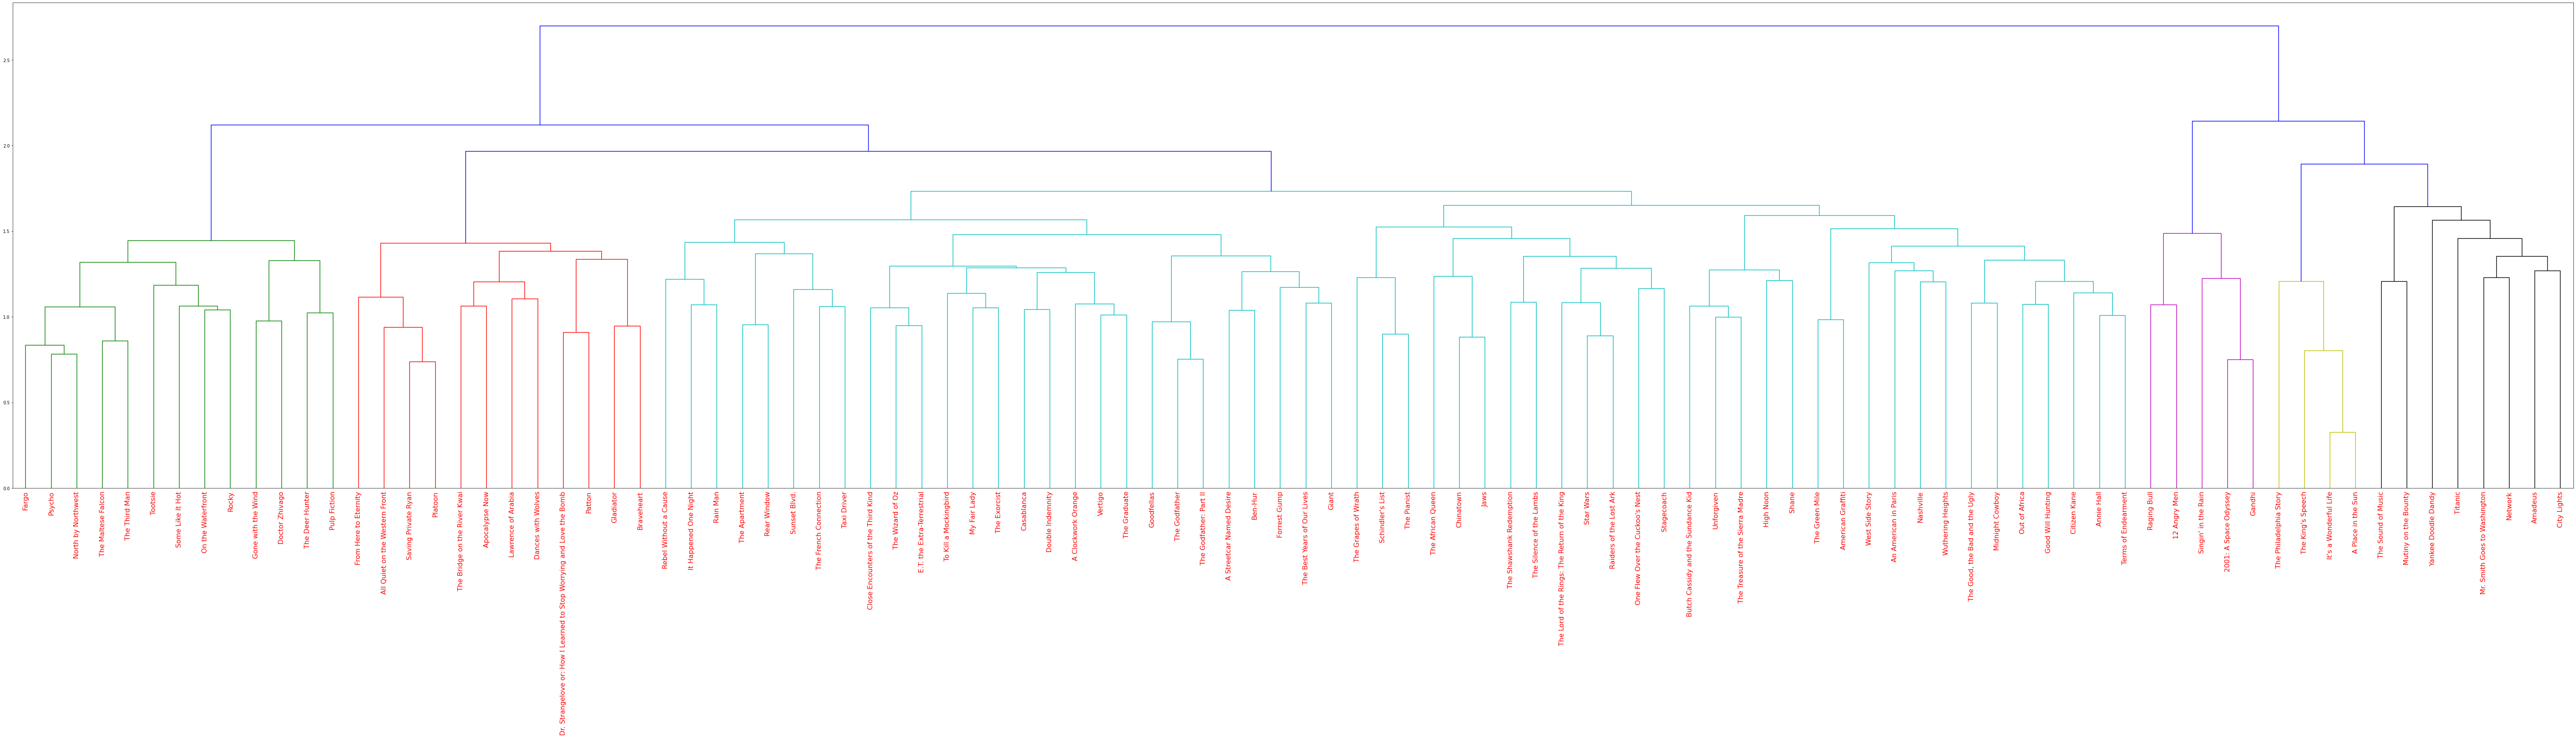

In [ ]:
from scipy.cluster.hierarchy import dendrogram,linkage
distac_matrix=linkage(distance,method='complete')
dendrogram_ = dendrogram(distac_matrix,
               labels=[x for x in movies["title"]],
               leaf_rotation=90,
               leaf_font_size=16,
)

# Adjust the plot
fig = plt.gcf()
_ = [lbl.set_color('r') for lbl in plt.gca().get_xmajorticklabels()]
fig.set_size_inches(108, 21)

# Show the plotted dendrogram
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

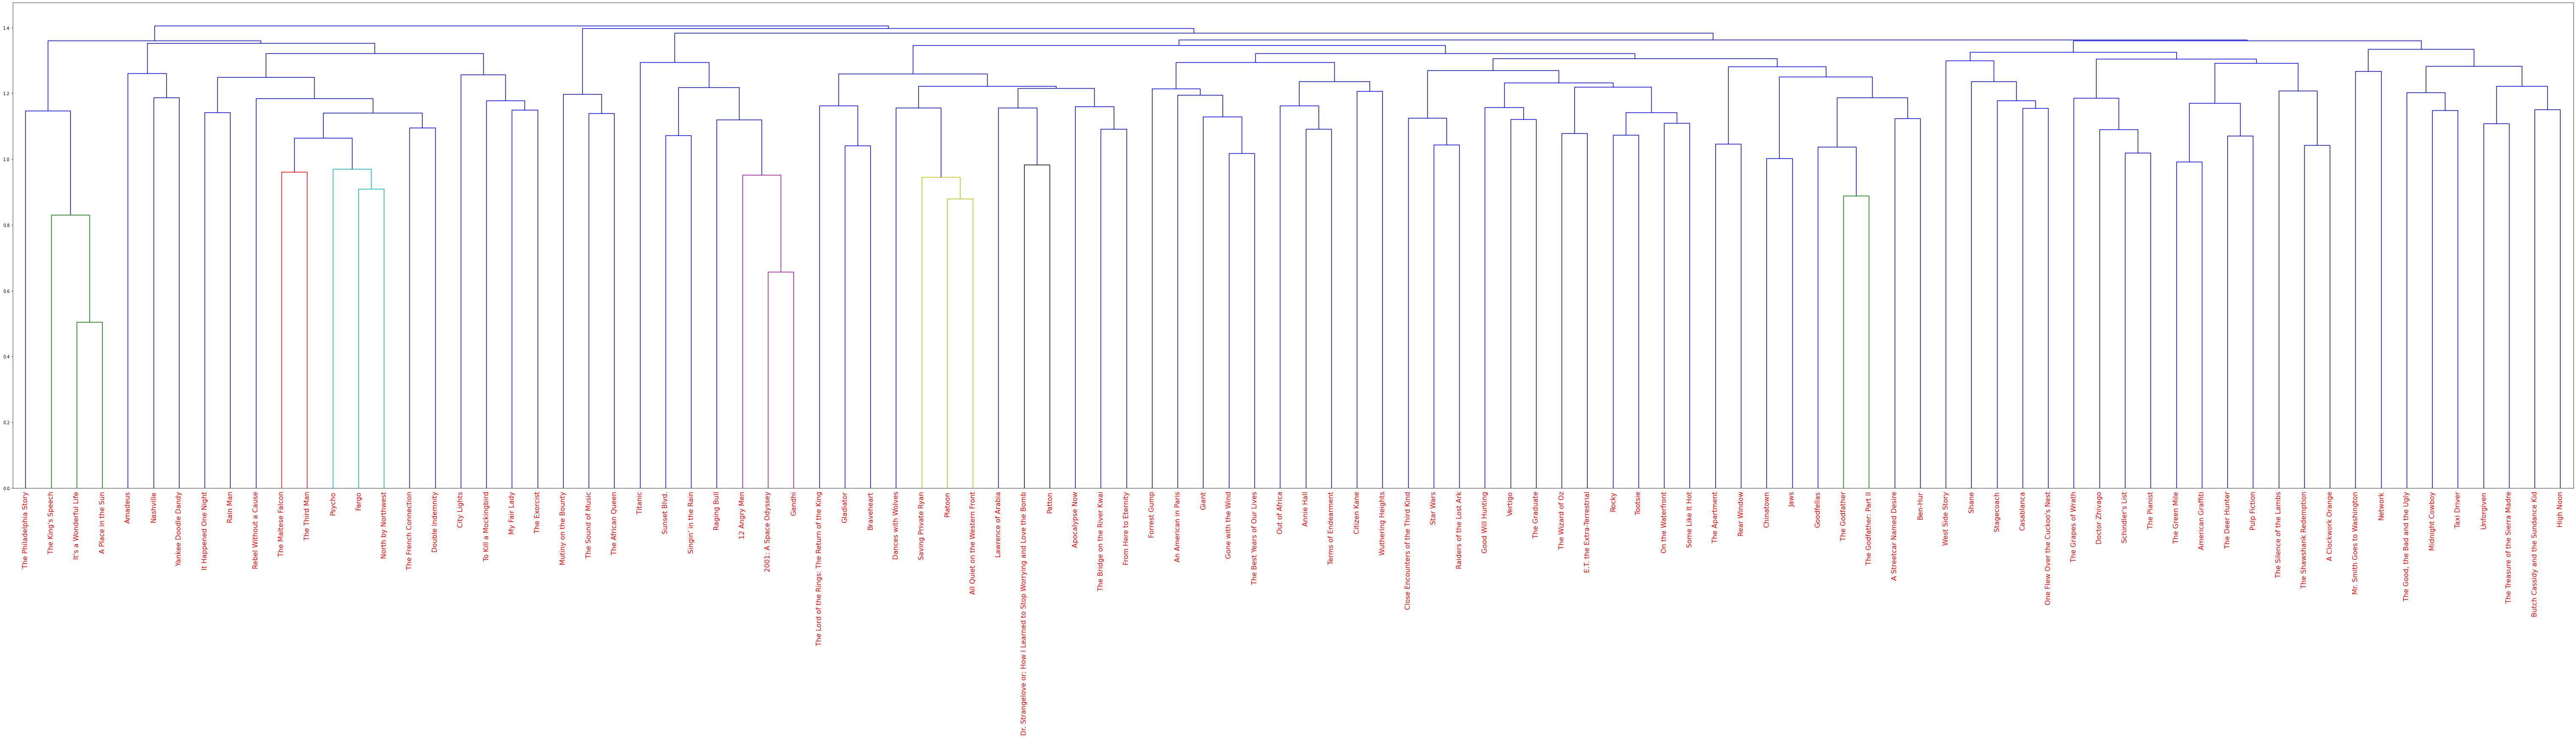

In [ ]:
from scipy.cluster.hierarchy import dendrogram,linkage
distac_matrix=linkage(tfidf_matrix.todense(),method='complete')
dendrogram_ = dendrogram(distac_matrix,
               labels=[x for x in movies["title"]],
               leaf_rotation=90,
               leaf_font_size=16,
)

# Adjust the plot
fig = plt.gcf()
_ = [lbl.set_color('r') for lbl in plt.gca().get_xmajorticklabels()]
fig.set_size_inches(108, 21)

# Show the plotted dendrogram
plt.show()